In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv('Supermart Grocery Sales - Retail Analytics Dataset.csv')  # Data Loading and Preparation
data.head(2)

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


In [5]:
data.shape


(9994, 11)

In [6]:
data.dtypes

Order ID          object
Customer Name     object
Category          object
Sub Category      object
City              object
Order Date        object
Region            object
Sales              int64
Discount         float64
Profit           float64
State             object
dtype: object

In [7]:
data.columns

Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

In [8]:
data.duplicated().sum()

0

In [9]:
data.isnull().sum().sum()

0

In [10]:
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=False, errors='coerce')  # Converting Order Date to datetime

data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day'] = data['Order Date'].dt.day

from sklearn.preprocessing import LabelEncoder  # Label encode

label_cols = ['Customer Name', 'Category', 'Sub Category', 'City', 'Region', 'State']
le = LabelEncoder()

for col in label_cols:
    data[col] = le.fit_transform(data[col])

data.head()  # Checking the updated dataset


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,Order Year,Order Month,Order Day
0,OD1,12,5,14,21,2017-11-08,2,1254,0.12,401.28,0,2017.0,11.0,8.0
1,OD2,37,1,13,8,2017-11-08,3,749,0.18,149.80,0,2017.0,11.0,8.0
2,OD3,14,3,0,13,2017-06-12,4,2360,0.21,165.20,0,2017.0,6.0,12.0
3,OD4,15,4,12,4,2016-10-11,3,896,0.25,89.60,0,2016.0,10.0,11.0
4,OD5,28,3,18,12,2016-10-11,3,2355,0.26,918.45,0,2016.0,10.0,11.0


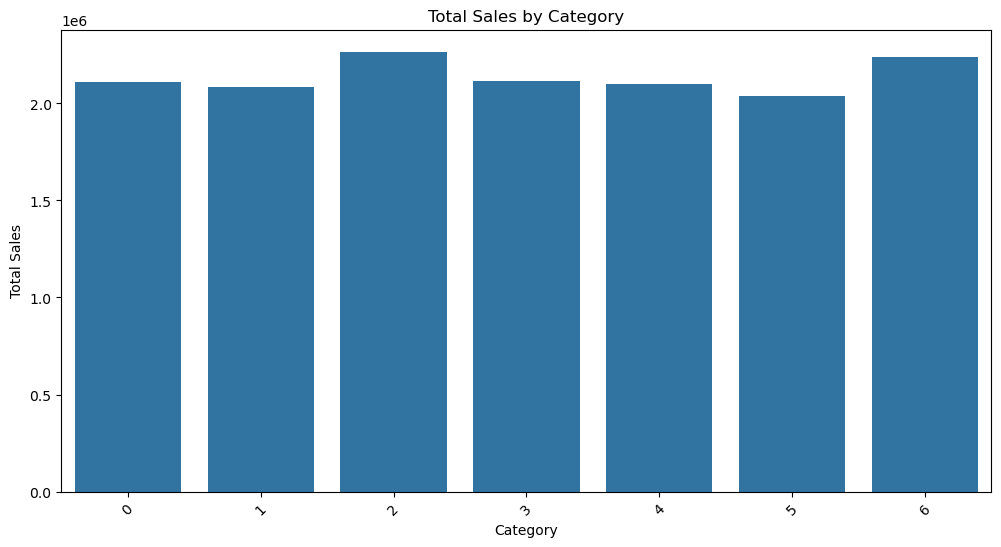

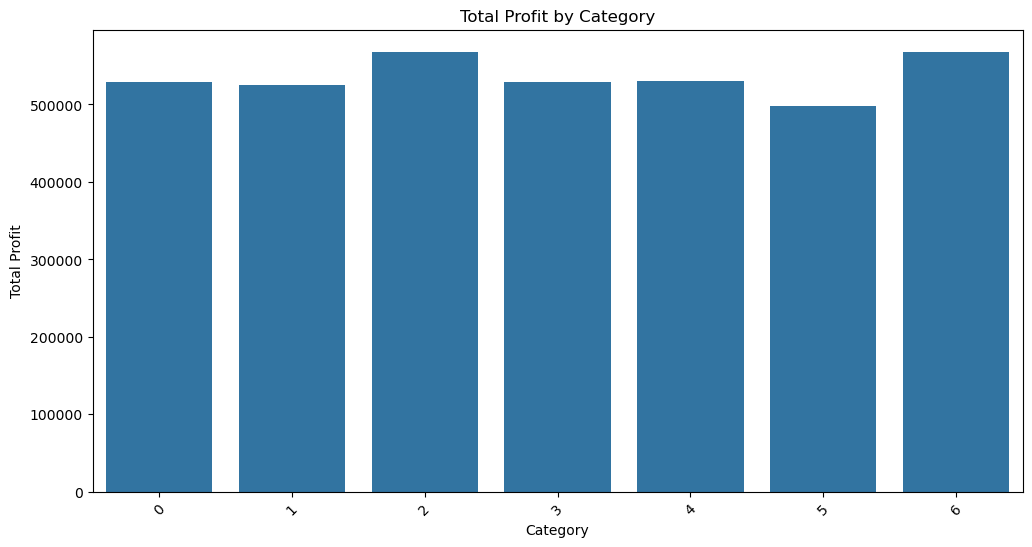

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Category', y='Sales', estimator=sum, errorbar=None)
plt.title("Total Sales by Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=data, x='Category', y='Profit', estimator=sum, errorbar=None)
plt.title("Total Profit by Category")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.show()


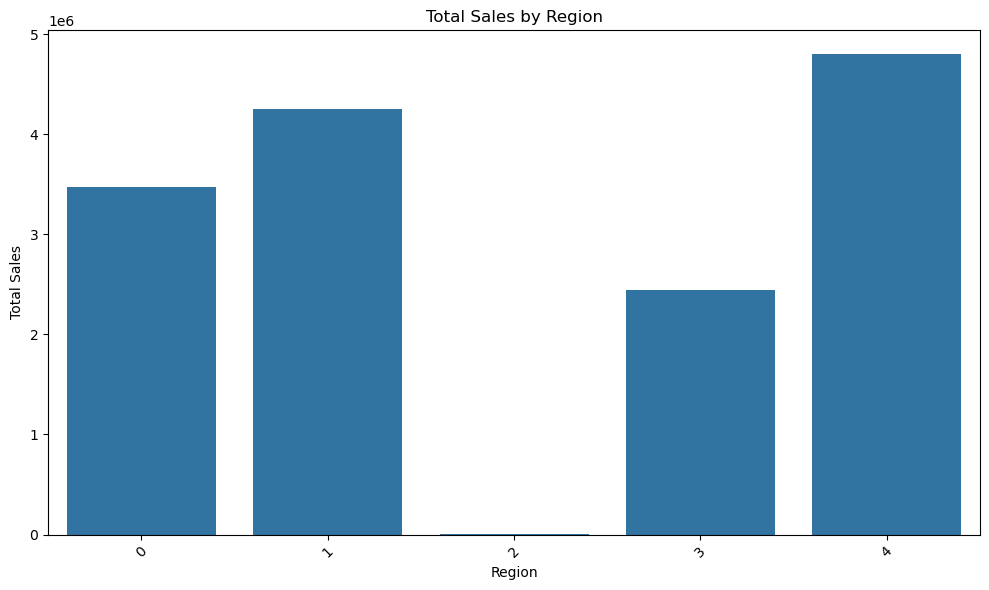

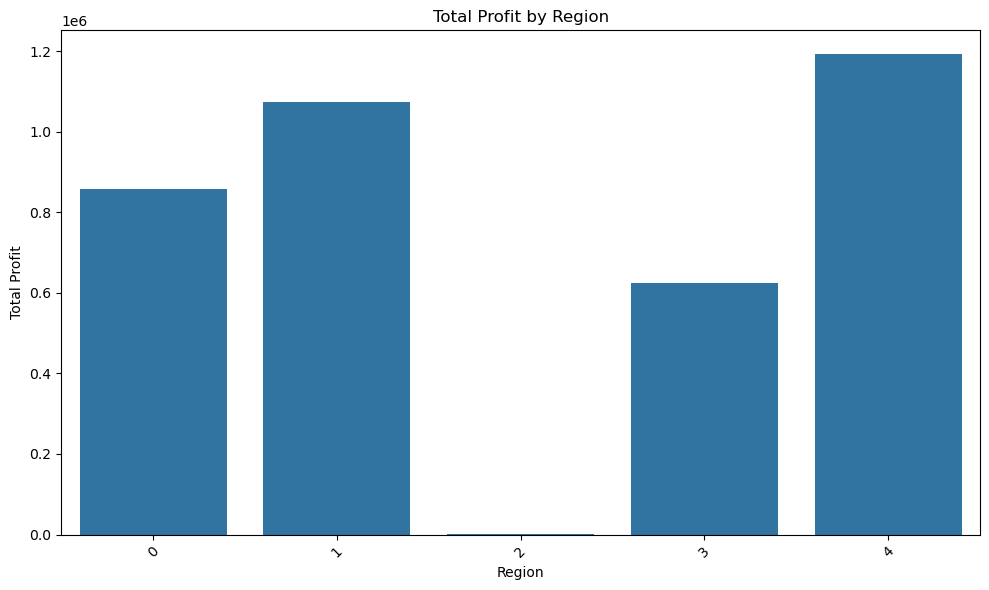

In [24]:
plt.figure(figsize=(10, 6))  # Total Sales
sns.barplot(data=data, x='Region', y='Sales', estimator=sum, errorbar=None)
plt.title("Total Sales by Region")
plt.ylabel("Total Sales")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))  # Total Profit
sns.barplot(data=data, x='Region', y='Profit', estimator=sum, errorbar=None)
plt.title("Total Profit by Region")
plt.ylabel("Total Profit")
plt.xlabel("Region")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


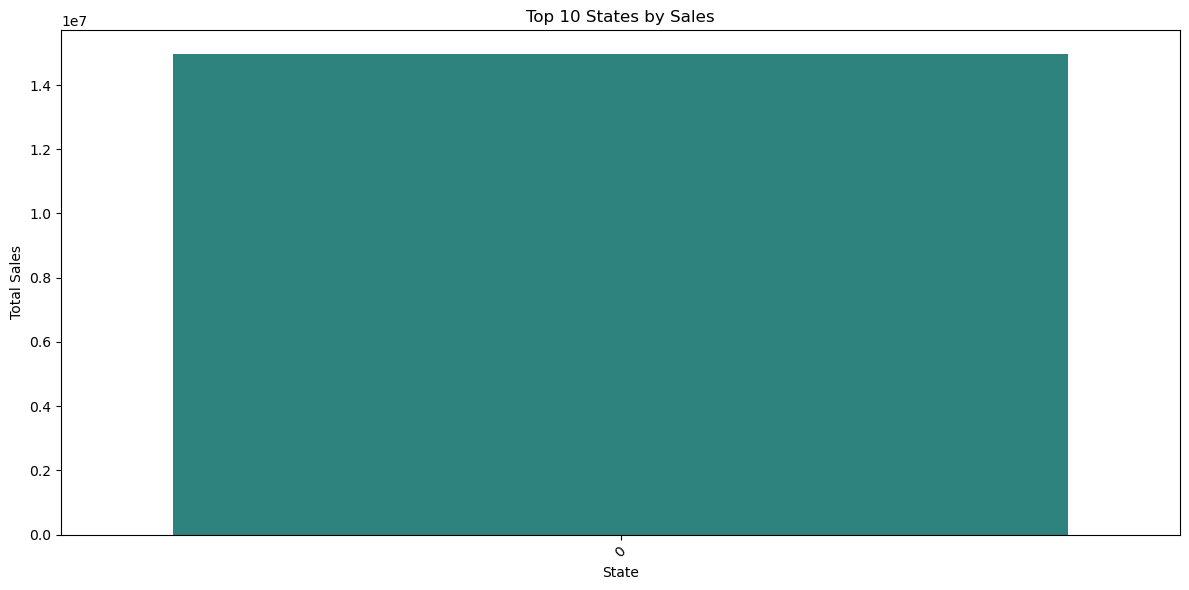

In [26]:
top_states_sales = data.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)  # Grouping

plt.figure(figsize=(12,6))
sns.barplot(x=top_states_sales.index, y=top_states_sales.values, palette='viridis')
plt.title("Top 10 States by Sales")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


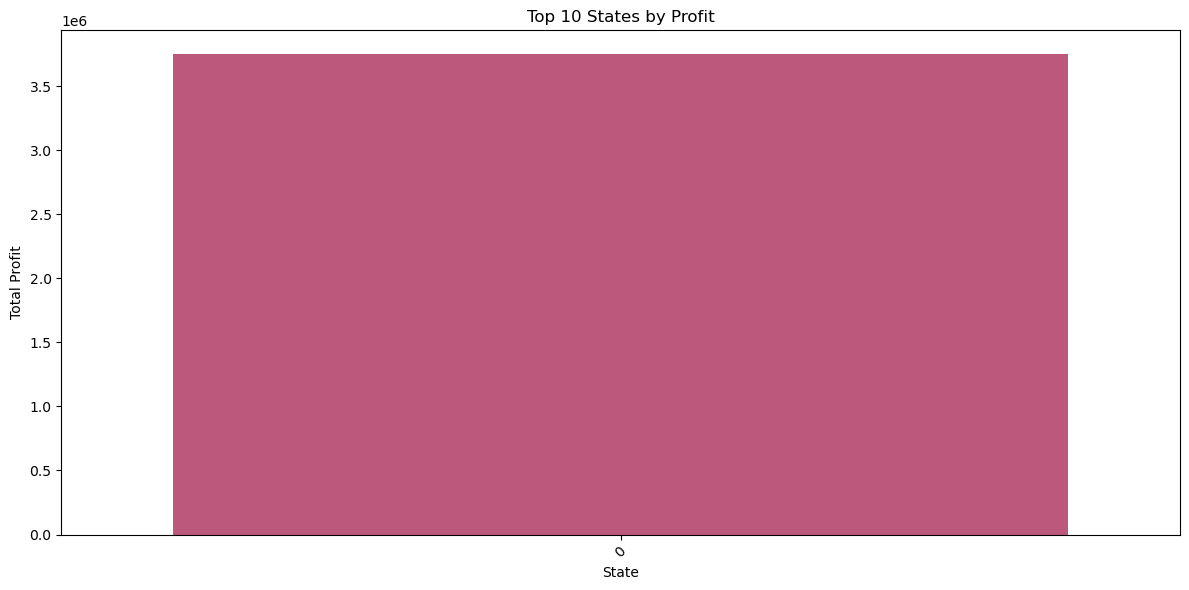

In [28]:
top_states_profit = data.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)  # Top 10 states by profit

plt.figure(figsize=(12,6))
sns.barplot(x=top_states_profit.index, y=top_states_profit.values, palette='plasma')
plt.title("Top 10 States by Profit")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


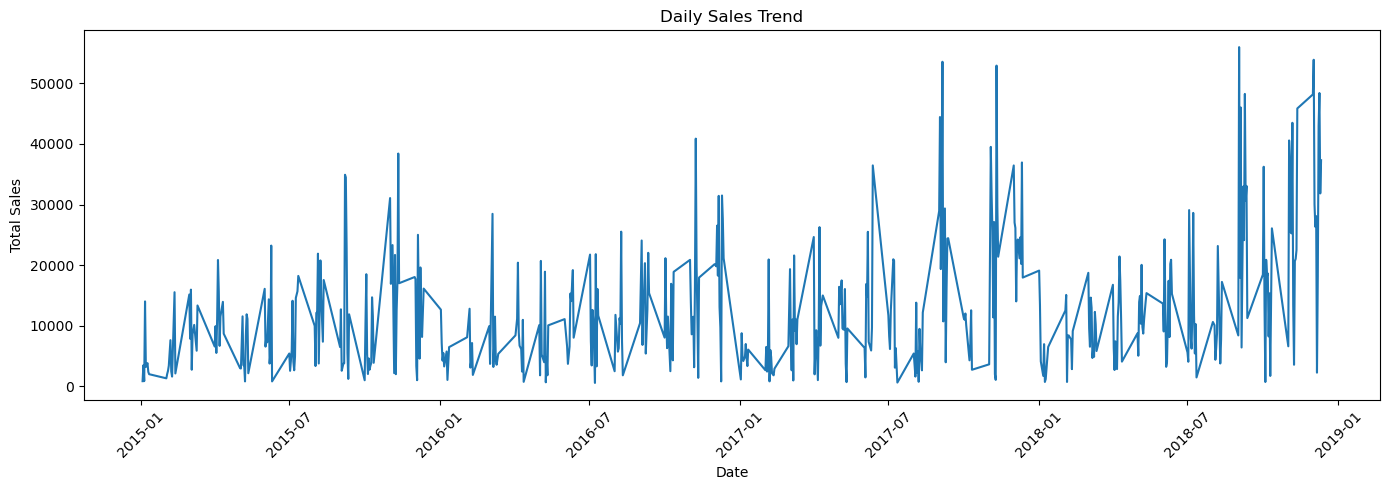

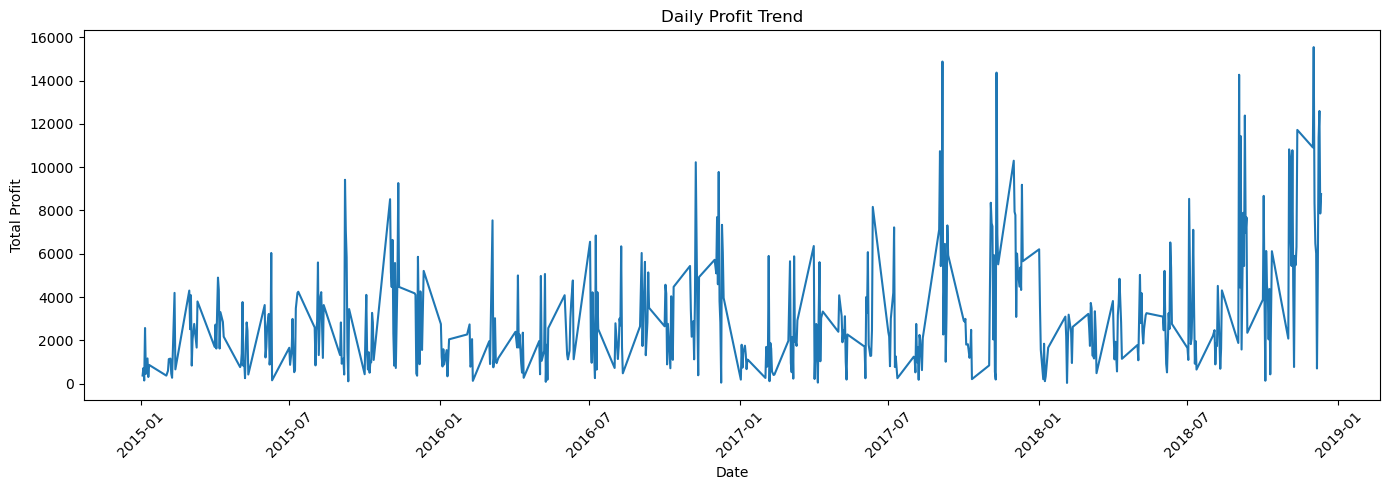

In [30]:
daily_data = data.groupby('Order Date')[['Sales', 'Profit']].sum().reset_index()  # Grouping

plt.figure(figsize=(14, 5))  # Plotting sales
sns.lineplot(data=daily_data, x='Order Date', y='Sales')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))  # Plotting profit
sns.lineplot(data=daily_data, x='Order Date', y='Profit')
plt.title('Daily Profit Trend')
plt.xlabel('Date')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [32]:
features = ['Sales', 'Discount']
target = 'Profit'

X = data[features]  # Splitting data
y = data[target]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Traintest split

model = LinearRegression()  # Training the model
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))  # Evaluation
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 38488.4357991851
R2 Score: 0.35562312780752237


In [ ]:
## Project Summary: Supermart Grocery Sales

# Objective:
The aim of this project was to analyze sales and profit data from a grocery retail dataset and gain useful insights. We also built a simple model to predict profit based on sales and discount.

# Dataset Details:
- Total Records: 9,994
- Columns: 11
- No missing or duplicate values
- Important fields: Order Date, Category, Sales, Profit, Discount, Region, State

# Key Analysis:
- Bar plots ued to compare sales and profit across categories and regions
- Identified top 10 states by sales and profit
- Time series plots showed increasing trends in sales and profit

# Model Summary:
- Linear Regression used to predict Profit
- Features used: Sales and Discount
- Mean Squared Error: 38,488
- R² Score: 0.356

# Tools Used:
- Python
- Pandas
- Matplotlib & Seaborn
- Scikit-learn

# Conclusion:
The analysis helped understand sales trends and regional performance. The model gives a basic estimate of profit and can be improved further.s
